<a href="https://colab.research.google.com/github/24-mariem/webscryping-py/blob/master/Copie_de_MLcolon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlrose # mlrose est un package Python permettant d'appliquer certains des algorithmes d'optimisation et de recherche aléatoires les plus courants à une gamme de problèmes d'optimisation différents, sur des espaces de paramètres à valeurs discrètes et continues.

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
import numpy as np #NumPy est très utile pour effectuer des calculs logiques et mathématiques sur des tableaux et des matrices. 
import pandas as pd #Cette bibliothèque permet de facilement compenser les données manquantes
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns # offre la possibilité de résumer et de visualiser des données. Elle permet de créer de jolis graphiques statistiques en Python
# fractionnement de données
from sklearn.model_selection import train_test_split
#ML
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import r2_score,roc_auc_score,adjusted_rand_score
import statsmodels.formula.api as sm
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error
from typing import Dict, List, Tuple

In [ ]:
pd.set_option('display.max_columns', None)# Options pour contrôler l'affichage des données

In [ ]:
from google.colab import files #durée = 2min
files.upload()

In [ ]:
ds = pd.read_excel("dsfcolon.xlsx")#notre dataset s'appelle "ds"
ds.columns

Index(['sex', 'gdist', 'agex', 'age', 'cola02g', 'riskOrl', 'riskOesp',
       'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv', 'risklung',
       'riskprost', 'riskblad', 'riskkidy', 'riskCNS'],
      dtype='object')

In [ ]:
ds.nunique()
#Compter le nombre d'éléments distincts dans l'axe spécifié.

In [ ]:
#nettoiyage dataset
#Prendre soin des valeurs manquantes
ds.isnull().sum()

In [ ]:
# étudier l'éxcés de risque relative en utilisant le dose absorbé au niveau de colon 

In [ ]:
x=ds.drop(['riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'],axis=1, errors='raise')
y=ds.get(['riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS']) #.get () j'ai une erreur avec cette git j'ai l'annuler (If we have a listlike key, _check_indexing_error will raise)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)
# trainsize: le flottant, doit être compris entre 0,0 et 1,0 et représenter la proportion de l'ensemble de données à inclure dans la division du train. donc 70% sont inclus dans le train.
#random state: Contrôle le brassage appliqué aux données avant d'appliquer le fractionnement. Passez un int pour une sortie reproductible sur plusieurs appels de fonction

In [ ]:
x_train.columns

Index(['sex', 'gdist', 'agex', 'age', 'cola02g'], dtype='object')

In [ ]:
y_test.columns

Index(['riskOrl', 'riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr',
       'riskliv', 'risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'],
      dtype='object')

In [ ]:
#regression linéaire 
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
r2_pred_lr=r2_score(y_test,y_pred_lr)
r2_pred_lr

0.6454446094176213

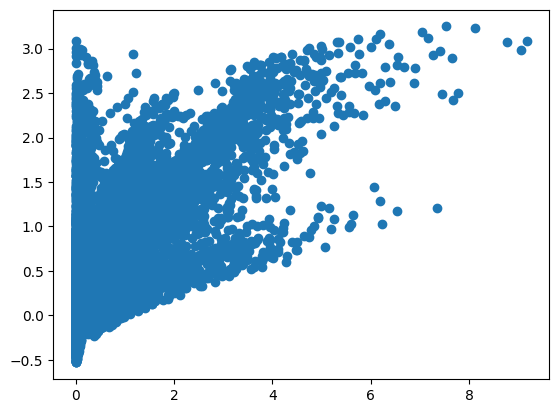

In [ ]:
plt.scatter(y_test,y_pred_lr)

In [ ]:
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(y_test, y_pred_lr)
import numpy as np
n = len(y_test)
p = len(lr.coef_) # nombre de variables explicatives
rse = np.sqrt((1/(n-p-1)) * eqm)
import scipy.stats as stats
t = stats.t.ppf(0.975, n-p-1) # pour un niveau de confiance de 95%
import scipy.stats as stats
t = stats.t.ppf(0.975, n-p-1) # pour un niveau de confiance de 95%


In [ ]:
lower = y_pred_lr - t * rse
print(lower)

[[ 0.25468893  0.53550843  0.23046365 ...  0.6450445   0.34470879
   0.62409973]
 [-0.07742705 -0.06113884 -0.07123284 ... -0.27284944 -0.03969565
   0.14825506]
 [ 0.01231975  0.10356037  0.010332   ... -0.02967092  0.07235211
   0.29047462]
 ...
 [ 0.2540135   0.37653131  0.22811217 ...  0.86427864  0.10341048
   0.00308398]
 [ 0.13096774  0.1676759   0.1164709  ...  0.50711465 -0.00759318
  -0.12527632]
 [ 0.61178403  1.17540618  0.55483345 ...  1.63425189  0.76277174
   1.1293487 ]]


In [ ]:
upper = y_pred_lr + t * rse
print(upper)

[[ 0.28968745  0.57050695  0.26546217 ...  0.68004302  0.37970731
   0.65909824]
 [-0.04242853 -0.02614032 -0.03623432 ... -0.23785092 -0.00469713
   0.18325358]
 [ 0.04731827  0.13855889  0.04533052 ...  0.0053276   0.10735063
   0.32547314]
 ...
 [ 0.28901202  0.41152983  0.26311069 ...  0.89927716  0.138409
   0.03808249]
 [ 0.16596626  0.20267441  0.15146942 ...  0.54211317  0.02740533
  -0.0902778 ]
 [ 0.64678255  1.2104047   0.58983196 ...  1.6692504   0.79777026
   1.16434722]]


In [ ]:
# Mettre l'IC dans un dataframe pandas
df = pd.Series({ 'y_pred_lr': y_pred_lr,'Lower CI': lower, 'Upper CI': upper})#'y_test':y_test, DataFrame
df = df[[ 'y_pred_lr', 'Lower CI', 'Upper CI']]
#.Series
# Afficher le dataframe
print(df)

y_pred_lr    [[0.27218819381810766, 0.5530076877167424, 0.2...
Lower CI     [[0.2546889348149142, 0.535508428713549, 0.230...
Upper CI     [[0.2896874528213011, 0.5705069467199357, 0.26...
dtype: object


In [ ]:
def r2_all(LinearRegression, x_train, y_train, x_test, y_test, y_pred_lr):
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, lr.predict(x_train))
    r2_test = r2_score(y_test, lr.predict(x_test))
    r2_pred_lr=r2_score(y_test,y_pred_lr)
    print(f'R2 Train: {r2_train}, R2 Test: {r2_test},R2 pred: {r2_pred_lr}')
    return r2_train, r2_test,r2_pred_lr
def mae_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_lr):
    from sklearn.metrics import mean_absolute_error
    mae_train = mean_absolute_error(y_train, lr.predict(x_train))
    mae_test = mean_absolute_error(y_test, lr.predict(x_test))
    mae_pred_lr = mean_absolute_error(y_test, y_pred_lr)
    print(f'MAE Train: {mae_train}, MAE Test: {mae_test}, MAE pred: {mae_pred_lr}' )
    return mae_train, mae_test, mae_pred_lr
def mse_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_lr):
    from sklearn.metrics import mean_squared_error
    mse_train = mean_squared_error(y_train, lr.predict(x_train))
    mse_test = mean_squared_error(y_test, lr.predict(x_test))
    mse_pred_lr=mean_squared_error(y_test,y_pred_lr)
    print(f'mse Train: {mse_train}, mse Test: {mse_test}, mse pred: {mse_pred_lr}' )
    return mse_train, mse_test, mse_pred_lr
def var_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_lr):
    from sklearn.metrics import explained_variance_score
    var_train = explained_variance_score(y_train, lr.predict(x_train))
    var_test = explained_variance_score(y_test, lr.predict(x_test))
    var_pred_lr=explained_variance_score(y_test,y_pred_lr)
    print(f'var Train: {var_train}, var Test: {var_test}, var pred: {var_pred_lr}' )
    return var_train, var_test, var_pred_lr
def evs_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_rf, multioutput='uniform_average' ):
    from sklearn.metrics import explained_variance_score
    evs_train = explained_variance_score(y_train, lr.predict(x_train), multioutput=multioutput)
    evs_test = explained_variance_score(y_test, lr.predict(x_test), multioutput=multioutput)
    evs_pred_lr= explained_variance_score(y_test, y_pred_lr, multioutput=multioutput)
    print(f'EVS Train: {evs_train}, EVS Test: {evs_test}, EVS pred: {evs_pred_lr}' )
    return evs_train, evs_test, evs_pred_lr
def rmse_all (LinearRegression, X_train, y_train, X_test, y_test, y_pred_lr):
    from numpy import sqrt 
    from sklearn.metrics import mean_squared_error
    rmse_train = sqrt(mean_squared_error(y_train, lr.predict(X_train)))
    rmse_test = sqrt(mean_squared_error(y_test, lr.predict(X_test)))
    rmse_pred_lr = sqrt(mean_squared_error(y_test,  y_pred_lr))
    print(f'RMSE Train: {rmse_train}, RMSE Test: {rmse_test}, RMSE pred_lr: {rmse_pred_lr}' )
    return rmse_train, rmse_test, rmse_pred_lr

In [ ]:
r2_train, r2_test, r2_pred_lr = r2_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)
mae_train, mae_test,mae_pred_lr= mae_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)
mse_train, mse_test,mse_pred_lr = mse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)
var_train, var_test,var_pred_lr = var_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)
evs_train, evs_test,evs_pred_lr = evs_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)
rmse_train, rmse_test,rmse_pred_lr = rmse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_lr)

df = [[r2_train, mae_train, mse_train,  mse_train,evs_train,rmse_train],
      [r2_test, mae_test, mse_test,  var_test, evs_test,rmse_test],
      [r2_pred_lr, mae_pred_lr,mse_pred_lr,  var_pred_lr, evs_pred_lr,rmse_pred_lr]]

R2 Train: 0.6454296690754674, R2 Test: 0.6592285195406268,R2 pred: 0.6592285195406268
MAE Train: 0.18722227416774725, MAE Test: 0.1845843782530434, MAE pred: 0.1845843782530434
mse Train: 0.17323664229366356, mse Test: 0.15549276221939667, mse pred: 0.15549276221939667
var Train: 0.6454296690754674, var Test: 0.6592500461336638, var pred: 0.6592500461336638
EVS Train: 0.6454296690754674, EVS Test: 0.6592500461336638, EVS pred: 0.6592500461336638
RMSE Train: 0.41621706151197546, RMSE Test: 0.3943257057552762, RMSE pred_lr: 0.3943257057552762


In [ ]:
def plot_r2_mae_mse_var_evs_rmse(df):
    X = np.arange(6)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, df[0], color = 'y', width = 0.25)
    ax.bar(X + 0.25, df[1], color = 'r', width = 0.25)
    ax.bar(X + 0.50, df[2], color = 'g', width = 0.25)
    ax.set_ylabel("Values")
    ax.set_title("Metrics")
    ax.set_xticks(X + 0.20 / 2)
    ax.set_xticklabels(('R2', 'MAE', 'mse', 'var', 'EVS', 'RMSE'))
    ax.legend(labels=['Train', 'Test','Valid'])
    return fig, ax

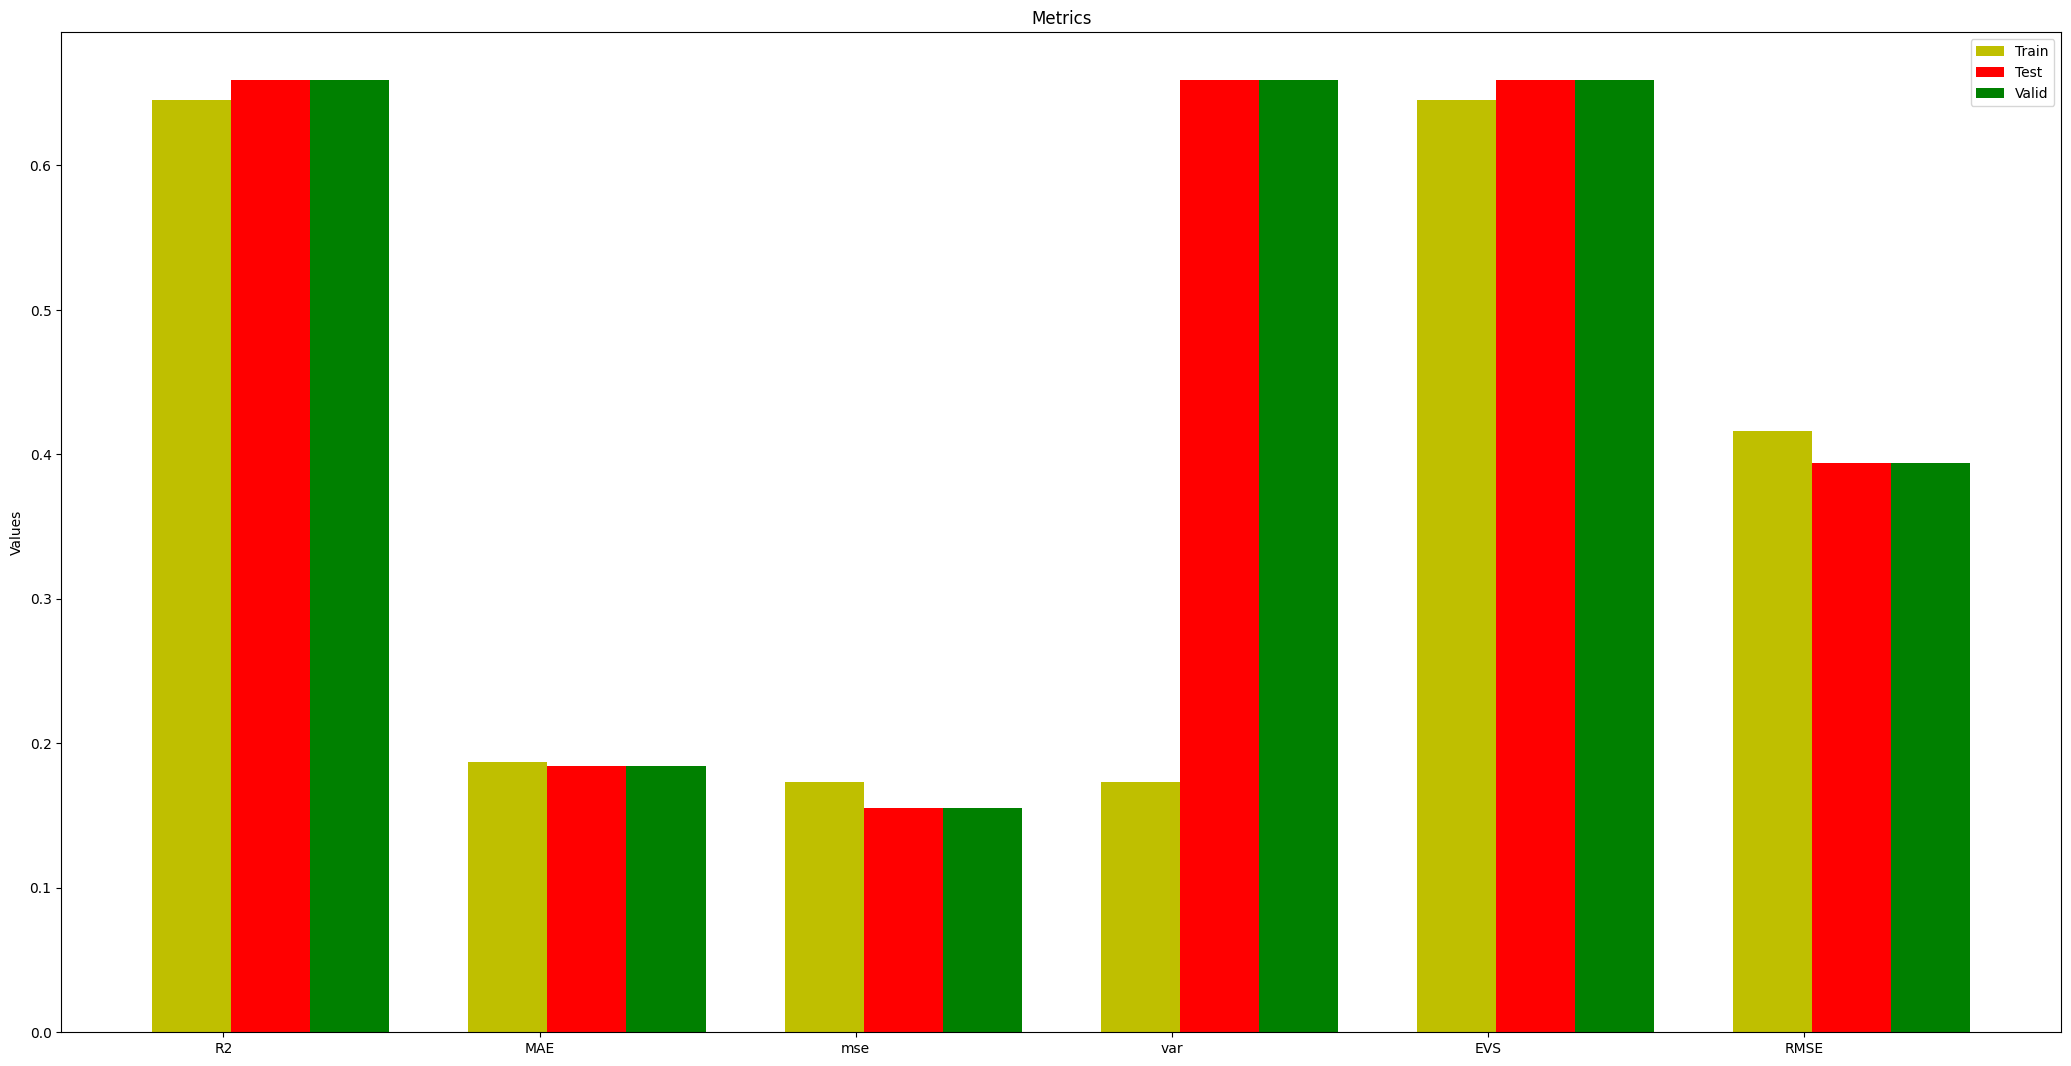

In [ ]:
fig, ax = plot_r2_mae_mse_var_evs_rmse(df)

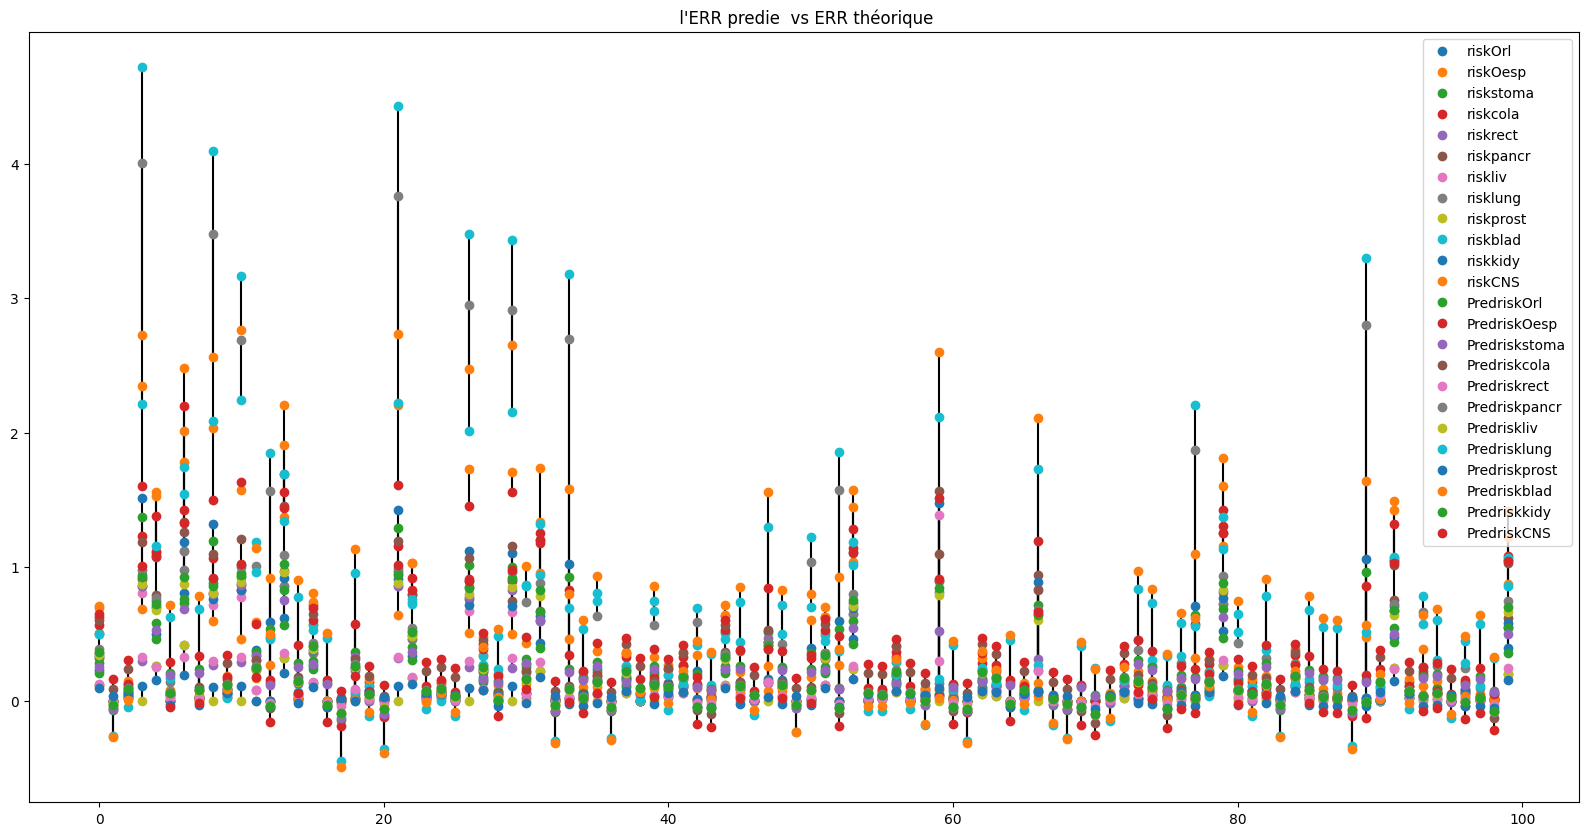

In [ ]:
def see_prediction_error(number_to_see):
    Y = y_test.iloc[:number_to_see]
    X = [i for i in range(len(Y))]

    fig = plt.figure(figsize=(20,10))

    for index in range(len(X)):
        plt.plot([X[index], X[index]], [Y.iloc[index], y_pred_lr[index]], c="black")
    plt.plot(X, Y, 'o', label=('riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'))  
    plt.plot(X, y_pred_lr[:number_to_see],  'o',label=('PredriskOrl','PredriskOesp', 'Predriskstoma', 'Predriskcola', 'Predriskrect', 'Predriskpancr', 'Predriskliv','Predrisklung', 'Predriskprost', 'Predriskblad', 'Predriskkidy', 'PredriskCNS')) #c'est telement superposé il faut mettre cette ligne en comentaire pour voir les true risk real

    plt.title(" l'ERR predie  vs ERR théorique")
    plt.legend()
    plt.show()
    
number_to_see = 100
see_prediction_error(number_to_see)

In [ ]:
#régression des crêtes
ridge=Ridge()
ridge.get_params()
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
r2_pred_ridge=r2_score(y_test,y_pred_ridge)
r2_pred_ridge

0.6592633814805916

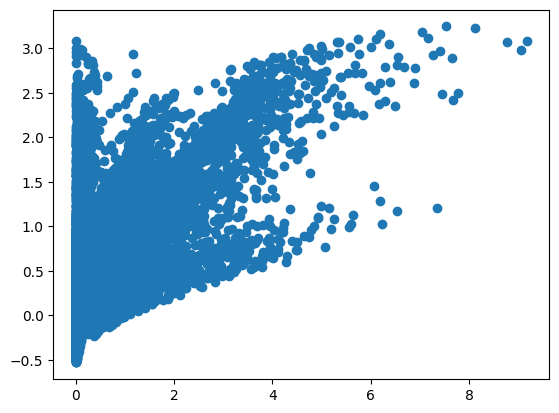

In [ ]:
plt.scatter(y_test,y_pred_ridge) 

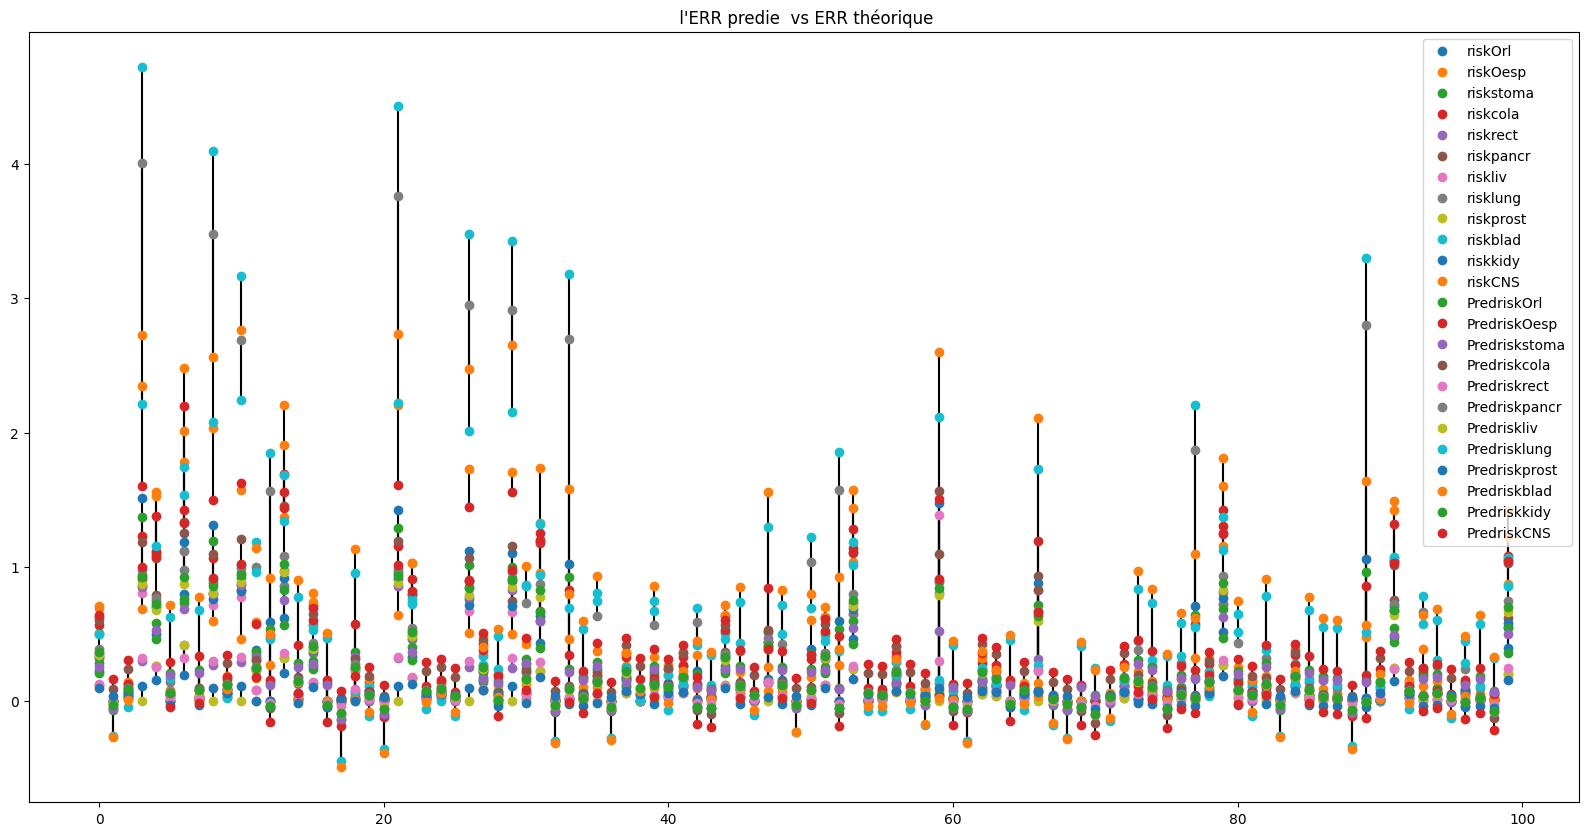

In [ ]:
def see_prediction_error(number_to_see):
    Y = y_test.iloc[:number_to_see]
    X = [i for i in range(len(Y))]

    fig = plt.figure(figsize=(20,10))

    for index in range(len(X)):
        plt.plot([X[index], X[index]], [Y.iloc[index], y_pred_ridge[index]], c="black")
    plt.plot(X, Y, 'o', label=('riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'))  
    plt.plot(X, y_pred_ridge[:number_to_see],  'o',label=('PredriskOrl','PredriskOesp', 'Predriskstoma', 'Predriskcola', 'Predriskrect', 'Predriskpancr', 'Predriskliv','Predrisklung', 'Predriskprost', 'Predriskblad', 'Predriskkidy', 'PredriskCNS')) #c'est telement superposé il faut mettre cette ligne en comentaire pour voir les true risk real

    plt.title(" l'ERR predie  vs ERR théorique")
    plt.legend()
    plt.show()
    
number_to_see = 100
see_prediction_error(number_to_see)

In [ ]:
def r2_all(Ridge, x_train, y_train, x_test, y_test, y_pred_ridge):
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, ridge.predict(x_train))
    r2_test = r2_score(y_test, ridge.predict(x_test))
    r2_pred=r2_score(y_test,y_pred_ridge)
    print(f'R2 Train: {r2_train}, R2 Test: {r2_test},R2 pred: {r2_pred}')
    return r2_train, r2_test,r2_pred
def mae_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_ridge):
    from sklearn.metrics import mean_absolute_error
    mae_train = mean_absolute_error(y_train, ridge.predict(x_train))
    mae_test = mean_absolute_error(y_test, ridge.predict(x_test))
    mae_pred = mean_absolute_error(y_test, y_pred_ridge)
    print(f'MAE Train: {mae_train}, MAE Test: {mae_test}, MAE pred: {mae_pred}' )
    return mae_train, mae_test, mae_pred
def mse_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_ridge):
    from sklearn.metrics import mean_squared_error
    mse_train = mean_squared_error(y_train, ridge.predict(x_train))
    mse_test = mean_squared_error(y_test, ridge.predict(x_test))
    mse_pred=mean_squared_error(y_test,y_pred_ridge)
    print(f'mse Train: {mse_train}, mse Test: {mse_test}, mse pred: {mse_pred}' )
    return mse_train, mse_test, mse_pred
def var_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_ridge):
    from sklearn.metrics import explained_variance_score
    var_train = explained_variance_score(y_train, ridge.predict(x_train))
    var_test = explained_variance_score(y_test, ridge.predict(x_test))
    var_pred=explained_variance_score(y_test,y_pred_ridge)
    print(f'var Train: {var_train}, var Test: {var_test}, var pred: {var_pred}' )
    return var_train, var_test, var_pred
def evs_all (LinearRegression, x_train, y_train, x_test, y_test, y_pred_ridge, multioutput='uniform_average' ):
    from sklearn.metrics import explained_variance_score
    evs_train = explained_variance_score(y_train, ridge.predict(x_train), multioutput=multioutput)
    evs_test = explained_variance_score(y_test, ridge.predict(x_test), multioutput=multioutput)
    evs_pred= explained_variance_score(y_test, y_pred_ridge, multioutput=multioutput)
    print(f'EVS Train: {evs_train}, EVS Test: {evs_test}, EVS pred: {evs_pred}' )
    return evs_train, evs_test, evs_pred
def rmse_all (LinearRegression, X_train, y_train, X_test, y_test, y_pred_ridge):
    from numpy import sqrt 
    from sklearn.metrics import mean_squared_error
    rmse_train = sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    rmse_test = sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    rmse_pred = sqrt(mean_squared_error(y_test,  y_pred_ridge))
    print(f'RMSE Train: {rmse_train}, RMSE Test: {rmse_test}, RMSE pred_lr: {rmse_pred}' )
    return rmse_train, rmse_test, rmse_pred

In [ ]:
r2_train, r2_test, r2_pred = r2_all(r2_score, x_train, y_train, x_test, y_test,y_pred_ridge)
mae_train, mae_test,mae_pred= mae_all(r2_score, x_train, y_train, x_test, y_test, y_pred_ridge)
mse_train, mse_test,mse_pred = mse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_ridge)
var_train, var_test,var_pred = var_all(r2_score, x_train, y_train, x_test, y_test, y_pred_ridge)
evs_train, evs_test,evs_pred = evs_all(r2_score, x_train, y_train, x_test, y_test, y_pred_ridge)
rmse_train, rmse_test,rmse_pred = rmse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_ridge)

df = [[r2_train, mae_train, mse_train,  var_train,evs_train,rmse_train],
      [r2_test, mae_test, mse_test,  var_test, evs_test,rmse_test],
      [r2_pred, mae_pred,mse_pred,  var_pred, evs_pred,rmse_pred]]

R2 Train: 0.6454293046615676, R2 Test: 0.6592368341344511,R2 pred: 0.6592368341344511
MAE Train: 0.1871739580217088, MAE Test: 0.18453931168600538, MAE pred: 0.18453931168600538
mse Train: 0.17323675820023954, mse Test: 0.15549051988693288, mse pred: 0.15549051988693288
var Train: 0.6454293046615676, var Test: 0.6592582828698892, var pred: 0.6592582828698892
EVS Train: 0.6454293046615676, EVS Test: 0.6592582828698892, EVS pred: 0.6592582828698892
RMSE Train: 0.41621720075008856, RMSE Test: 0.394322862495865, RMSE pred_lr: 0.394322862495865


In [ ]:
def plot_r2_mae_mse_var_evs_rmse(df):
    X = np.arange(6)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, df[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, df[1], color = 'r', width = 0.25)
    ax.bar(X + 0.50, df[2], color = 'g', width = 0.25)
    ax.set_ylabel("Values")
    ax.set_title("Metrics")
    ax.set_xticks(X + 0.20 / 2)
    ax.set_xticklabels(('R2', 'MAE', 'mse', 'var', 'EVS', 'RMSE'))
    ax.legend(labels=['Train', 'Test','Valid'])
    return fig, ax

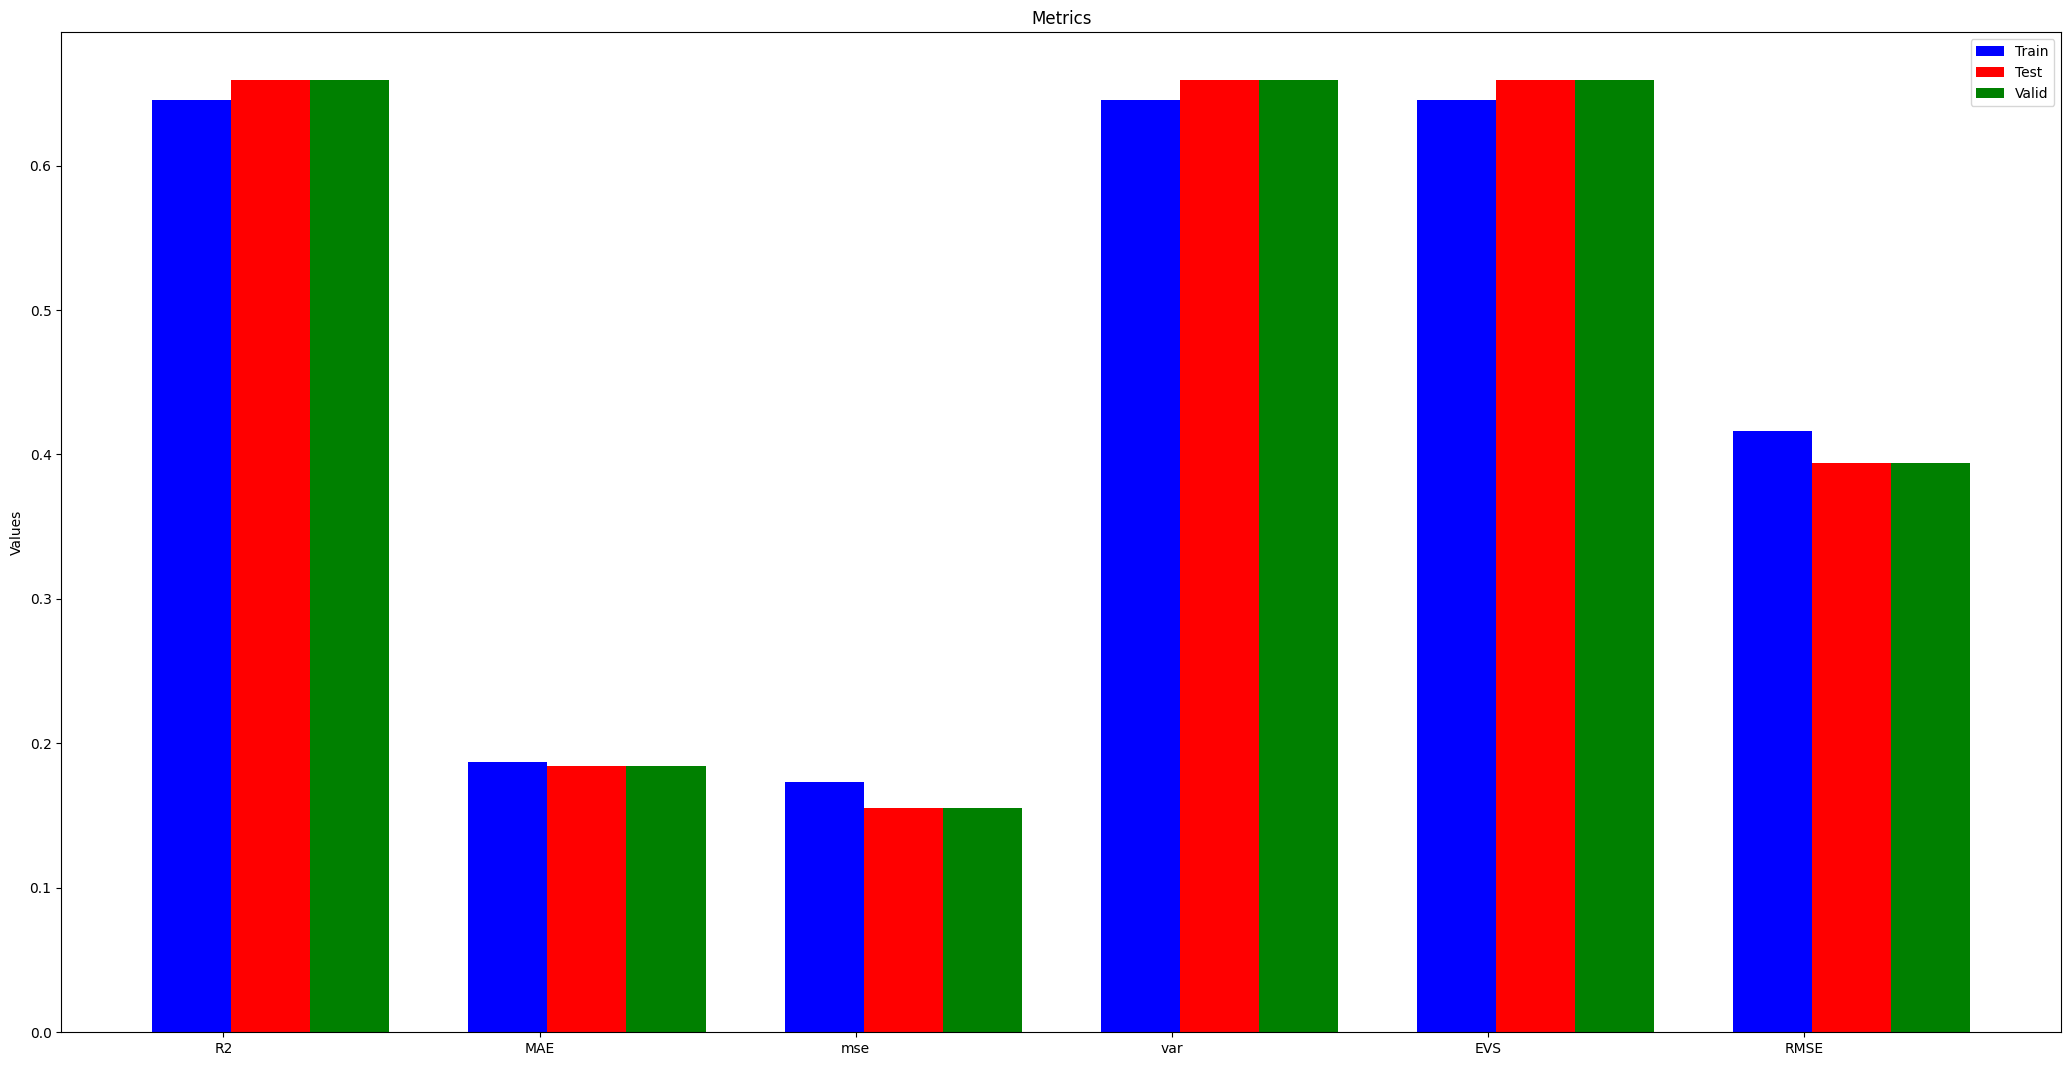

In [ ]:
fig, ax = plot_r2_mae_mse_var_evs_rmse(df)

In [ ]:
#decision tree regressor
dtcr=DecisionTreeRegressor()
dtcr.fit(x_train,y_train)
y_pred_dtcr=dtcr.predict(x_test)
r2_pred_dtcr=r2_score(y_test,y_pred_dtcr)
r2_pred_dtcr

0.7144043487338321

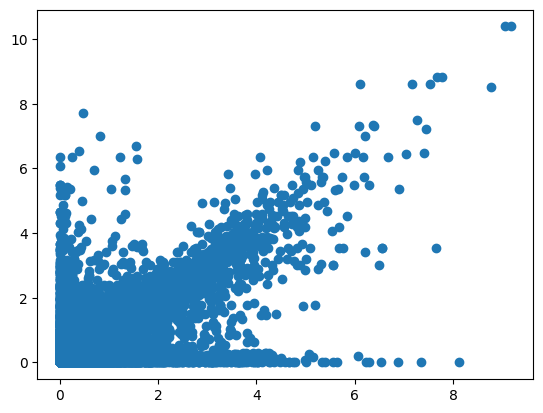

In [ ]:
plt.scatter(y_test,y_pred_dtcr)

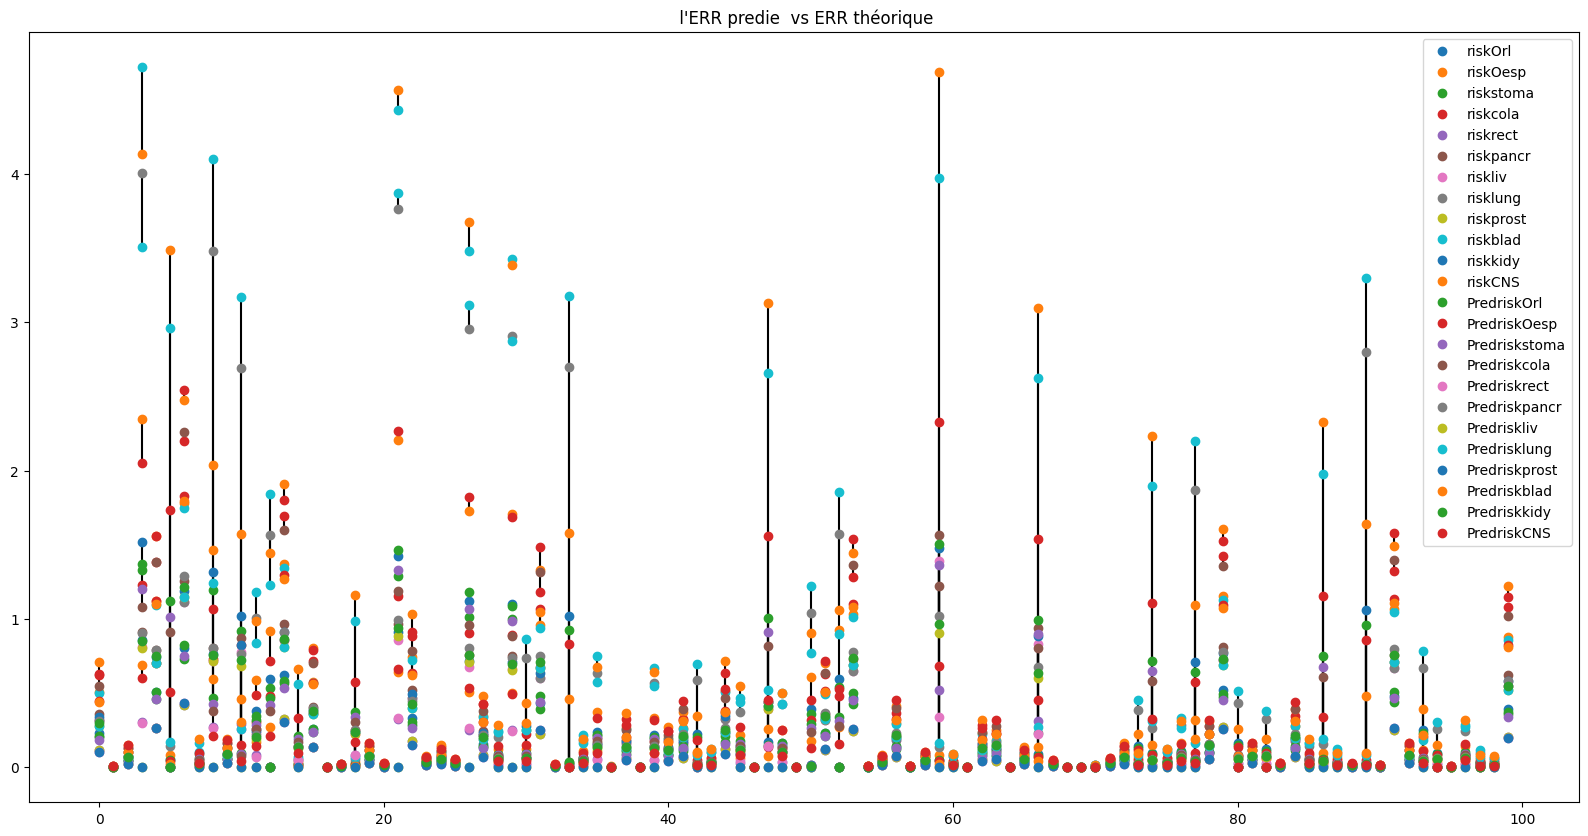

In [ ]:
def see_prediction_error(number_to_see):
    Y = y_test.iloc[:number_to_see]
    X = [i for i in range(len(Y))]

    fig = plt.figure(figsize=(20,10))

    for index in range(len(X)):
        plt.plot([X[index], X[index]], [Y.iloc[index], y_pred_dtcr[index]], c="black")
    plt.plot(X, Y, 'o', label=('riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'))  
    plt.plot(X, y_pred_dtcr[:number_to_see],  'o',label=('PredriskOrl','PredriskOesp', 'Predriskstoma', 'Predriskcola', 'Predriskrect', 'Predriskpancr', 'Predriskliv','Predrisklung', 'Predriskprost', 'Predriskblad', 'Predriskkidy', 'PredriskCNS')) #c'est telement superposé il faut mettre cette ligne en comentaire pour voir les true risk real

    plt.title(" l'ERR predie  vs ERR théorique")
    plt.legend()
    plt.show()
    
number_to_see = 100
see_prediction_error(number_to_see)

In [ ]:
def r2_all(DecisionTreeRegressor, x_train, y_train, x_test, y_test, y_pred_dtcr):
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, dtcr.predict(x_train))
    r2_test = r2_score(y_test, dtcr.predict(x_test))
    r2_pred=r2_score(y_test,y_pred_dtcr)
    print(f'R2 Train: {r2_train}, R2 Test: {r2_test},R2 pred: {r2_pred}')
    return r2_train, r2_test,r2_pred
def mae_all (DecisionTreeRegressor, x_train, y_train, x_test, y_test, y_pred_dtcr):
    from sklearn.metrics import mean_absolute_error
    mae_train = mean_absolute_error(y_train, dtcr.predict(x_train))
    mae_test = mean_absolute_error(y_test, dtcr.predict(x_test))
    mae_pred = mean_absolute_error(y_test, y_pred_dtcr)
    print(f'MAE Train: {mae_train}, MAE Test: {mae_test}, MAE pred: {mae_pred}' )
    return mae_train, mae_test, mae_pred
def mse_all (DecisionTreeRegressor, x_train, y_train, x_test, y_test, y_pred_dtcr):
    from sklearn.metrics import mean_squared_error
    mse_train = mean_squared_error(y_train, dtcr.predict(x_train))
    mse_test = mean_squared_error(y_test, dtcr.predict(x_test))
    mse_pred=mean_squared_error(y_test,y_pred_dtcr)
    print(f'mse Train: {mse_train}, mse Test: {mse_test}, mse pred: {mse_pred}' )
    return mse_train, mse_test, mse_pred
def var_all (DecisionTreeRegressor, x_train, y_train, x_test, y_test, y_pred_dtcr):
    from sklearn.metrics import explained_variance_score
    var_train = explained_variance_score(y_train, dtcr.predict(x_train))
    var_test = explained_variance_score(y_test, dtcr.predict(x_test))
    var_pred=explained_variance_score(y_test,y_pred_dtcr)
    print(f'var Train: {var_train}, var Test: {var_test}, var pred: {var_pred}' )
    return var_train, var_test, var_pred
def evs_all (DecisionTreeRegressor, x_train, y_train, x_test, y_test, y_pred_dtcr, multioutput='uniform_average' ):
    from sklearn.metrics import explained_variance_score
    evs_train = explained_variance_score(y_train, dtcr.predict(x_train), multioutput=multioutput)
    evs_test = explained_variance_score(y_test, dtcr.predict(x_test), multioutput=multioutput)
    evs_pred= explained_variance_score(y_test, y_pred_dtcr, multioutput=multioutput)
    print(f'EVS Train: {evs_train}, EVS Test: {evs_test}, EVS pred: {evs_pred}' )
    return evs_train, evs_test, evs_pred
def rmse_all (DecisionTreeRegressor, X_train, y_train, X_test, y_test, y_pred_dtcr):
    from numpy import sqrt 
    from sklearn.metrics import mean_squared_error
    rmse_train = sqrt(mean_squared_error(y_train, dtcr.predict(X_train)))
    rmse_test = sqrt(mean_squared_error(y_test, dtcr.predict(X_test)))
    rmse_pred = sqrt(mean_squared_error(y_test,  y_pred_dtcr))
    print(f'RMSE Train: {rmse_train}, RMSE Test: {rmse_test}, RMSE pred_lr: {rmse_pred}' )
    return rmse_train, rmse_test, rmse_pred

In [ ]:
r2_train, r2_test, r2_pred = r2_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)
mae_train, mae_test,mae_pred= mae_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)
mse_train, mse_test,mse_pred = mse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)
var_train, var_test,var_pred = var_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)
evs_train, evs_test,evs_pred = evs_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)
rmse_train, rmse_test,rmse_pred = rmse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_dtcr)

df = [[r2_train, mae_train, mse_train,  var_train,evs_train,rmse_train],
      [r2_test, mae_test, mse_test,  var_test, evs_test,rmse_test],
      [r2_pred, mae_pred,mse_pred,  var_pred, evs_pred,rmse_pred]]

R2 Train: 1.0, R2 Test: 0.6704001967175824,R2 pred: 0.6704001967175824
MAE Train: 0.0, MAE Test: 0.11853541776937238, MAE pred: 0.11853541776937238
mse Train: 0.0, mse Test: 0.1881177685697423, mse pred: 0.1881177685697423
var Train: 1.0, var Test: 0.6705072812117682, var pred: 0.6705072812117682
EVS Train: 1.0, EVS Test: 0.6705072812117682, EVS pred: 0.6705072812117682
RMSE Train: 0.0, RMSE Test: 0.43372545298811127, RMSE pred_lr: 0.43372545298811127


In [ ]:
def plot_r2_mae_mse_var_evs_rmse(df):
    X = np.arange(6)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, df[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, df[1], color = 'r', width = 0.25)
    ax.bar(X + 0.50, df[2], color = 'g', width = 0.25)
    ax.set_ylabel("Values")
    ax.set_title("Metrics")
    ax.set_xticks(X + 0.20 / 2)
    ax.set_xticklabels(('R2', 'MAE', 'mse', 'var', 'EVS', 'RMSE'))
    ax.legend(labels=['Train', 'Test','Valid'])
    return fig, ax

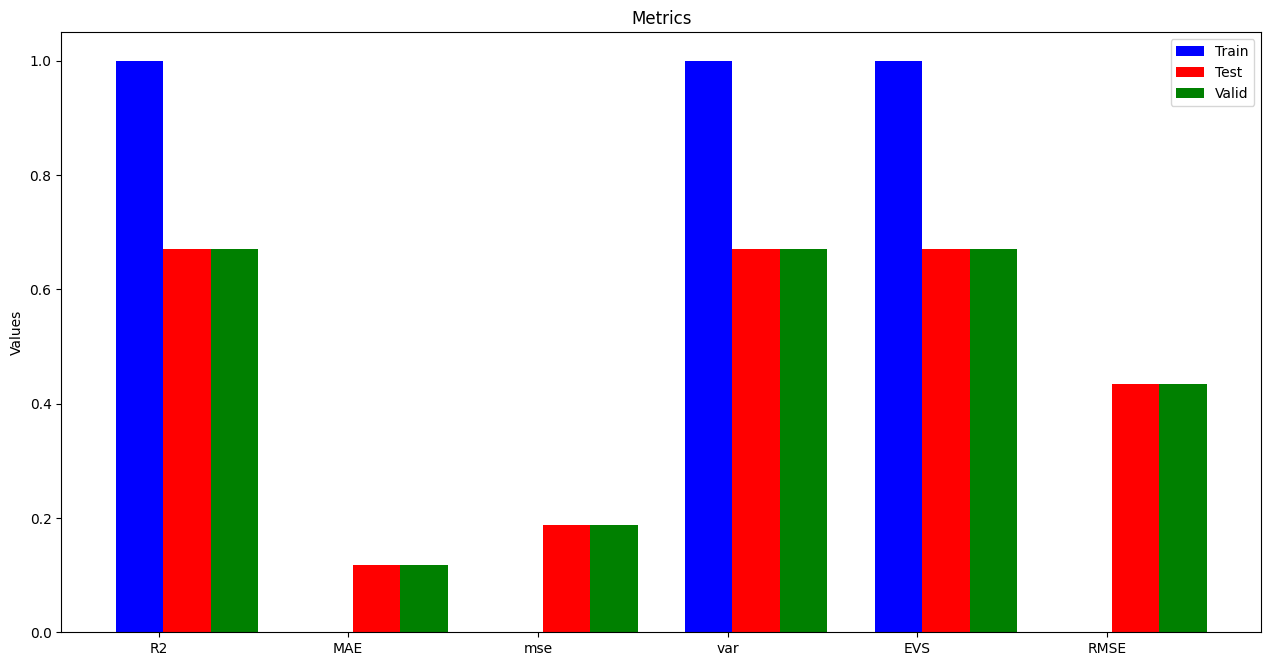

In [ ]:
fig, ax = plot_r2_mae_mse_var_evs_rmse(df)

In [ ]:
#random forest regressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rf=rfr.predict(x_test)
r2_pred=r2_score(y_test,y_pred_rf)
r2_pred

0.8230934736994109

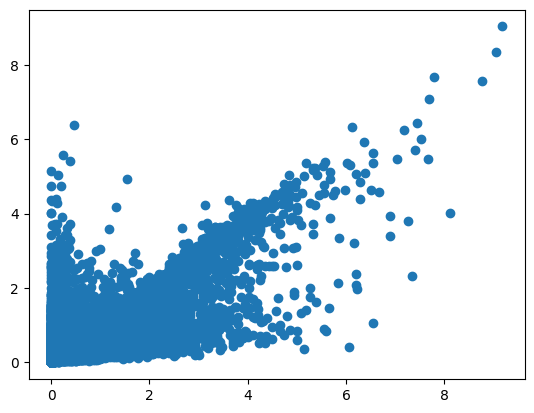

In [ ]:
plt.scatter(y_test,y_pred_rf) 

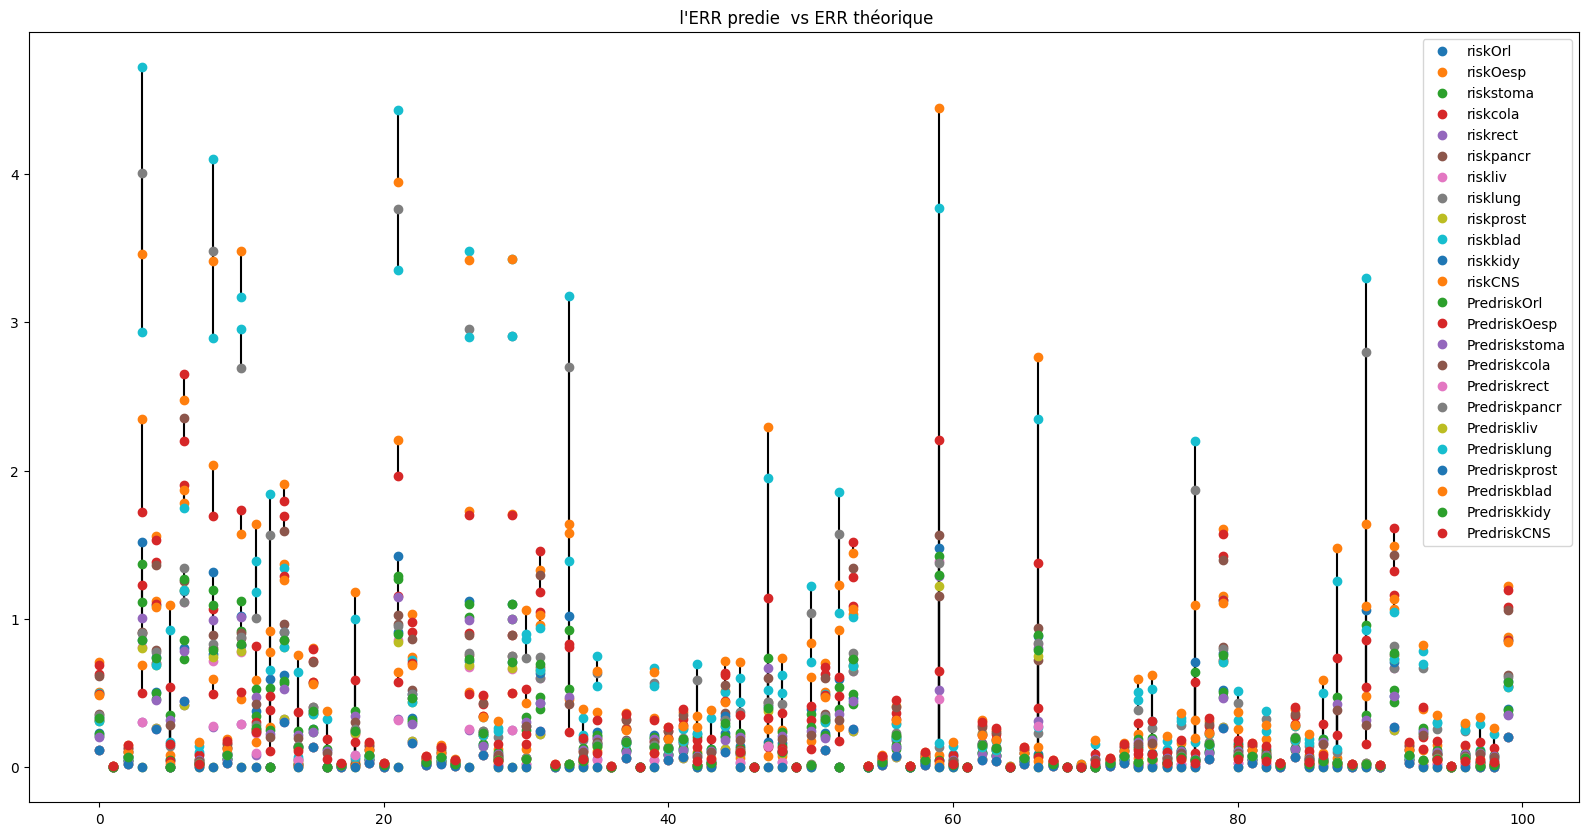

In [ ]:
def see_prediction_error(number_to_see):
    Y = y_test.iloc[:number_to_see]
    X = [i for i in range(len(Y))]

    fig = plt.figure(figsize=(20,10))

    for index in range(len(X)):
        plt.plot([X[index], X[index]], [Y.iloc[index], y_pred_rf[index]], c="black")
    plt.plot(X, Y, 'o', label=('riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'))  
    plt.plot(X, y_pred_rf[:number_to_see],  'o',label=('PredriskOrl','PredriskOesp', 'Predriskstoma', 'Predriskcola', 'Predriskrect', 'Predriskpancr', 'Predriskliv','Predrisklung', 'Predriskprost', 'Predriskblad', 'Predriskkidy', 'PredriskCNS')) #c'est telement superposé il faut mettre cette ligne en comentaire pour voir les true risk real

    plt.title(" l'ERR predie  vs ERR théorique")
    plt.legend()
    plt.show()
    
number_to_see = 100
see_prediction_error(number_to_see)

In [ ]:
def r2_all(RandomForestRegressor, x_train, y_train, x_test, y_test, y_pred_rf):
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, rfr.predict(x_train))
    r2_test = r2_score(y_test, rfr.predict(x_test))
    r2_pred=r2_score(y_test,y_pred_rf)
    print(f'R2 Train: {r2_train}, R2 Test: {r2_test},R2 pred: {r2_pred}')
    return r2_train, r2_test,r2_pred
def mae_all (RandomForestRegressor, x_train, y_train, x_test, y_test, y_pred_rf):
    from sklearn.metrics import mean_absolute_error
    mae_train = mean_absolute_error(y_train, rfr.predict(x_train))
    mae_test = mean_absolute_error(y_test, rfr.predict(x_test))
    mae_pred = mean_absolute_error(y_test, y_pred_rf)
    print(f'MAE Train: {mae_train}, MAE Test: {mae_test}, MAE pred: {mae_pred}' )
    return mae_train, mae_test, mae_pred
def mse_all (RandomForestRegressor, x_train, y_train, x_test, y_test, y_pred_rf):
    from sklearn.metrics import mean_squared_error
    mse_train = mean_squared_error(y_train, rfr.predict(x_train))
    mse_test = mean_squared_error(y_test, rfr.predict(x_test))
    mse_pred=mean_squared_error(y_test,y_pred_rf)
    print(f'mse Train: {mse_train}, mse Test: {mse_test}, mse pred: {mse_pred}' )
    return mse_train, mse_test, mse_pred
def var_all (RandomForestRegressor, x_train, y_train, x_test, y_test, y_pred_rf):
    from sklearn.metrics import explained_variance_score
    var_train = explained_variance_score(y_train, rfr.predict(x_train))
    var_test = explained_variance_score(y_test, rfr.predict(x_test))
    var_pred=explained_variance_score(y_test,y_pred_rf)
    print(f'var Train: {var_train}, var Test: {var_test}, var pred: {var_pred}' )
    return var_train, var_test, var_pred
def evs_all (RandomForestRegressor, x_train, y_train, x_test, y_test, y_pred_rf, multioutput='uniform_average' ):
    from sklearn.metrics import explained_variance_score
    evs_train = explained_variance_score(y_train, rfr.predict(x_train), multioutput=multioutput)
    evs_test = explained_variance_score(y_test, rfr.predict(x_test), multioutput=multioutput)
    evs_pred= explained_variance_score(y_test, y_pred_rf, multioutput=multioutput)
    print(f'EVS Train: {evs_train}, EVS Test: {evs_test}, EVS pred: {evs_pred}' )
    return evs_train, evs_test, evs_pred
def rmse_all (RandomForestRegressor, X_train, y_train, X_test, y_test, y_pred_rf):
    from numpy import sqrt 
    from sklearn.metrics import mean_squared_error
    rmse_train = sqrt(mean_squared_error(y_train, rfr.predict(X_train)))
    rmse_test = sqrt(mean_squared_error(y_test, rfr.predict(X_test)))
    rmse_pred = sqrt(mean_squared_error(y_test,  y_pred_rf))
    print(f'RMSE Train: {rmse_train}, RMSE Test: {rmse_test}, RMSE pred_lr: {rmse_pred}' )
    return rmse_train, rmse_test, rmse_pred

In [ ]:
r2_train, r2_test, r2_pred = r2_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)
mae_train, mae_test,mae_pred= mae_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)
mse_train, mse_test,mse_pred = mse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)
var_train, var_test,var_pred = var_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)
evs_train, evs_test,evs_pred = evs_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)
rmse_train, rmse_test,rmse_pred = rmse_all(r2_score, x_train, y_train, x_test, y_test, y_pred_rf)

df = [[r2_train, mae_train, mse_train,  var_train,evs_train,rmse_train],
      [r2_test, mae_test, mse_test,  var_test, evs_test,rmse_test],
      [r2_pred, mae_pred,mse_pred,  var_pred, evs_pred,rmse_pred]]

R2 Train: 0.9719921023412876, R2 Test: 0.8070131704884717,R2 pred: 0.8070131704884717
MAE Train: 0.03907937556894494, MAE Test: 0.10235208288275212, MAE pred: 0.10235208288275212
mse Train: 0.017487666646294222, mse Test: 0.11246536340982409, mse pred: 0.11246536340982409
var Train: 0.9719927970088159, var Test: 0.8070203731155944, var pred: 0.8070203731155944
EVS Train: 0.9719927970088159, EVS Test: 0.8070203731155944, EVS pred: 0.8070203731155944
RMSE Train: 0.13224094164174052, RMSE Test: 0.33535855947004556, RMSE pred_lr: 0.33535855947004556


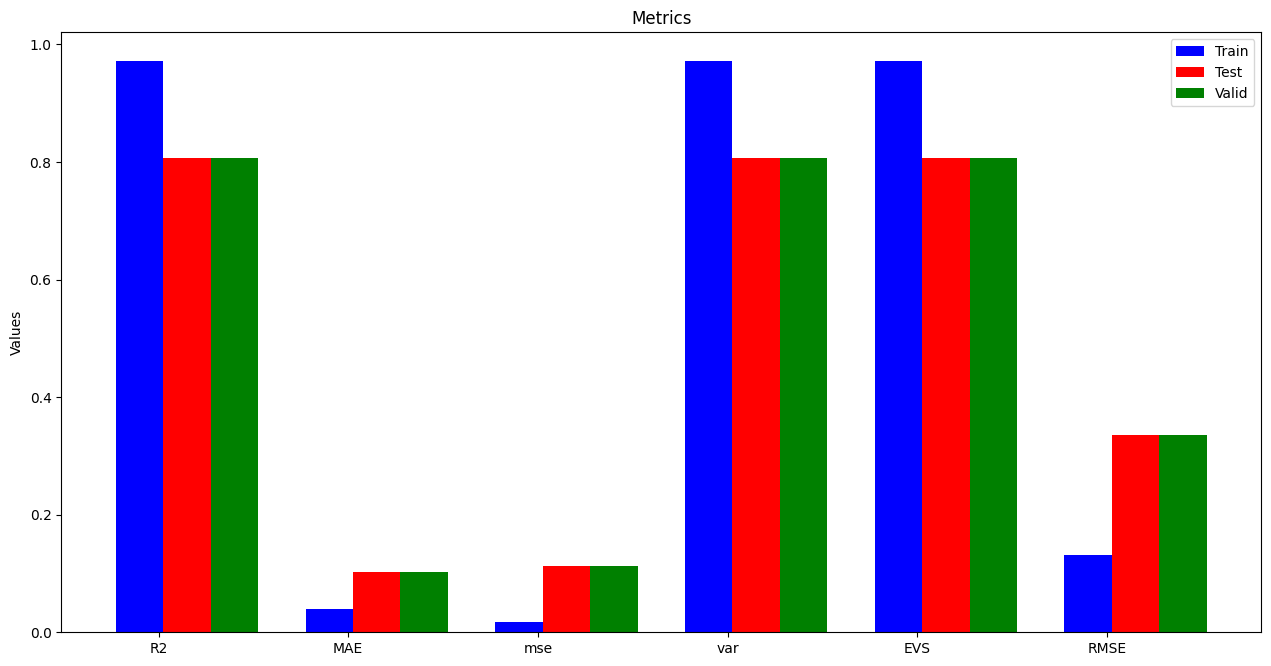

In [ ]:
fig, ax = plot_r2_mae_mse_var_evs_rmse(df)

In [ ]:
#GridSearchCV

In [ ]:
params={"n_jobs":[5,20,30],"positive":[True],"fit_intercept":[False],"copy_X":[False,True]}
#n_jobs entier, par défaut=Aucun: Nombre de tâches à exécuter en parallèle. None signifie 1. -1signifie utiliser tous les processeurs.
lrt=GridSearchCV(lr,params,cv=4,verbose=100,scoring='r2')#cv:  Détermine la stratégie de fractionnement de la validation croisé, cv est unentier, pour spécifier le nombre de plis
#scoring :Stratégie pour évaluer les performances du modèle à validation croisée sur l'ensemble de test.
lrt.fit(x_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': [False, True], 'fit_intercept': [False],
                         'n_jobs': [5, 20, 30], 'positive': [True]},
             scoring='r2', verbose=1)

In [ ]:
lrt.best_score_#Score moyen contre-validé du best_estimator

0.5683171776338487

In [ ]:
results = pd.DataFrame(lrt.cv_results_)
results

In [ ]:
print("Mejores parametros entcontrados:\n", lrt.best_estimator_)

Mejores parametros entcontrados:
 LinearRegression(copy_X=False, fit_intercept=False, n_jobs=5, positive=True)


In [ ]:
#utiliser gridsearchcv pour améliorer le score r2
params={"max_iter":[3,5,20],"positive":[True,False],"fit_intercept":[True,False],"copy_X":[True,False],"random_state":[10,20,30,45],"tol":[0.0003,0.0005,0.0002,0.0001],"alpha":[1.0,2.0,4.0,5.0]}
ridgetu=GridSearchCV(ridge,params,cv=4,verbose=100,n_jobs=5,scoring='r2')
ridgetu.fit(x_train,y_train)
ridgetu.best_score_

Fitting 4 folds for each of 1536 candidates, totalling 6144 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=5,
             param_grid={'alpha': [1.0, 2.0, 4.0, 5.0], 'copy_X': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [3, 5, 20],
                         'positive': [True, False],
                         'random_state': [10, 20, 30, 45],
                         'tol': [0.0003, 0.0005, 0.0002, 0.0001]},
             scoring='r2', verbose=1)

In [ ]:
ridgetu.best_score_

0.643401221306114

In [ ]:
results = pd.DataFrame(ridgetu.cv_results_)
results

In [ ]:
#random forest
params={"max_depth":[100,200],"min_samples_split":[3,5],"min_impurity_decrease":[0.5,1.0],
        "n_estimators":[200,500],"random_state":[10,20,40],"bootstrap":[True],"oob_score":[True]}
rfrt=GridSearchCV(rfr,params,cv=4,n_jobs=5,verbose=100,scoring="r2")
rfrt.fit(x_train,y_train)
rfrt.best_score_

In [ ]:
#using gridsearchcv to improve r2 score arbre aléatoire 
dtcr.get_params()
params={"max_depth":[10,20,30,40],"random_state":[20,40],'min_impurity_decrease':[1,2,3,4],"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[2,3,4,5,6],"ccp_alpha":[0.5,0.6,0.7]}
dtcrt=GridSearchCV(dtcr,params,cv=4,n_jobs=5,verbose=100,scoring='r2')
dtcrt.fit(x_train,y_train)
dtcrt.best_score_

In [ ]:
#Models Comparison
models = [ 'LinearRegression','Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor']
best_score = [lrt.best_score_, ridgetu.best_score_]

[Text(0.5, 1.0, 'best_score Comparison'),
 Text(0, 0.5, 'best_score'),
 (0.0, 1.25)]

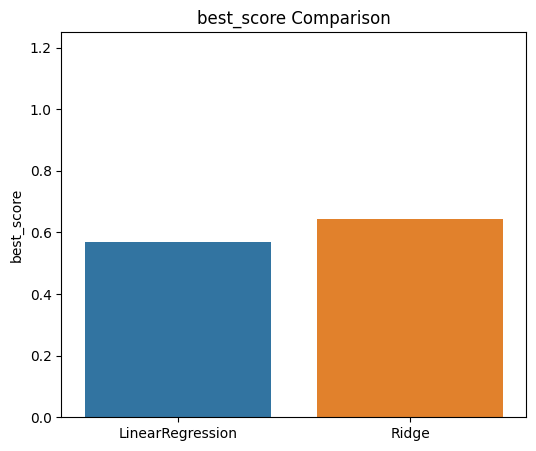

In [ ]:
#df = sns.load_dataset("penguins")
fig, ax = plt.subplots(1,1, figsize = (6,5))
plt.subplots_adjust(wspace = 0.6)
sns.barplot( x=models, y=best_score)
ax.set(title='best_score Comparison', ylabel='best_score', ylim=(0, 1.25))
#plt.show()

In [ ]:
#Models Comparison
models = [ 'LinearRegression','Ridge']
best_score = [lrt.best_score_, ridgetu.best_score_]
r2_score= [r2_pred_lr, r2_pred_ridge]

[Text(0.5, 1.0, 'r2_score Comparison'), Text(0, 0.5, 'accuracy'), (0.0, 1.0)]

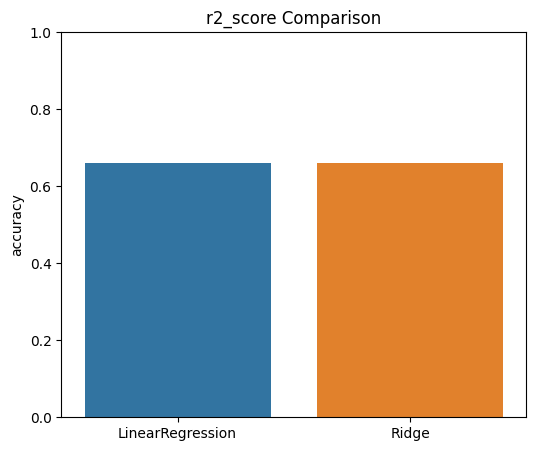

In [ ]:
#df = sns.load_dataset("penguins")
fig, ax = plt.subplots(1,1, figsize = (6,5))
plt.subplots_adjust(wspace = 0.01)
sns.barplot( x=models, y=r2_score)
ax.set(title='r2_score Comparison', ylabel='accuracy', ylim=(0, 1))
#plt.show()

In [ ]:
#prediction by gridsearchcv #https://www.kaggle.com/code/chbenitez/solar-radiation-regression

In [ ]:
x_train.columns

Index(['sex', 'gdist', 'agex', 'age', 'cola02g'], dtype='object')

In [ ]:
y_train.columns

Index(['riskOrl', 'riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr',
       'riskliv', 'risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'],
      dtype='object')

In [ ]:
Xnew = [[1,100,25,40,0.5]]
# make a prediction lrt.fit(x_train,y_train)
ynew = lr.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(ynew)):
 print("X=%s, Predicted=%s" % (Xnew, ynew[i]))

X=[[1, 100, 25, 40, 0.5]], Predicted=[0.26386261 0.53502907 0.24036661 0.57876959 0.11654446 0.34963337
 0.31078522 0.4604887  0.09869972 0.64376854 0.33020929 0.61779442]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#crette 
Xnew = [[1,100,25,40,0.5]]
# make a prediction lrt.fit(x_train,y_train)
ynew = ridge.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(ynew)):
 print("X=%s, Predicted=%s" % (Xnew, ynew[i]))

X=[[1, 100, 25, 40, 0.5]], Predicted=[0.26436454 0.5358048  0.24082117 0.57917443 0.11668766 0.35006299
 0.3111671  0.46181608 0.09869908 0.6453323  0.33061504 0.61801844]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
#tree descion
Xnew = [[1,100,25,40,0.5]]
# make a prediction lrt.fit(x_train,y_train)
ynew = dtcr.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(ynew)):
 print("X=%s, Predicted=%s" % (Xnew, ynew[i]))

X=[[1, 100, 25, 40, 0.5]], Predicted=[0.17067084 0.37844404 0.1558299  0.4674897  0.08904566 0.26713697
 0.23745509 0.23745509 0.08904566 0.37102357 0.25229603 0.52685347]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#random forest
Xnew = [[1,100,25,40,0.5]]
# make a prediction lrt.fit(x_train,y_train)
ynew = rfr.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(ynew)):
 print("X=%s, Predicted=%s" % (Xnew, ynew[i]))

X=[[1, 100, 25, 40, 0.5]], Predicted=[0.20154715 0.44690889 0.18402131 0.55206393 0.10515503 0.3154651
 0.28041342 0.28041342 0.10515503 0.43814597 0.29793926 0.62216728]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# descion tree

In [ ]:
ds = pd.read_excel("dsfcolon.xlsx")#notre dataset s'appelle "ds"

In [ ]:
#encoding:Les modèles d'apprentissage automatique ne peuvent fonctionner qu'avec des valeurs numériques. Pour cette raison, il est nécessaire de transformer les valeurs catégorielles des caractéristiques pertinentes en valeurs numériques . Ce processus est appelé codage de caractéristiques
le=LabelEncoder()
ds["cola02g"]=le.fit_transform(ds["cola02g"])
ds["sex"]=le.fit_transform(ds["sex"])
ds["agex"]=le.fit_transform(ds["agex"])
ds["age"]=le.fit_transform(ds["age"])
ds["riskOrl"]=le.fit_transform(ds["riskOrl"])

ds["riskOesp"]=le.fit_transform(ds["riskOesp"])
ds["riskstoma"]=le.fit_transform(ds["riskstoma"])
ds["riskcola"]=le.fit_transform(ds["riskcola"])
ds["riskrect"]=le.fit_transform(ds["riskrect"])
ds["riskpancr"]=le.fit_transform(ds["riskpancr"])
ds["riskliv"]=le.fit_transform(ds["riskliv"])
ds["risklung"]=le.fit_transform(ds["risklung"])
ds["riskprost"]=le.fit_transform(ds["riskprost"])
ds["riskblad"]=le.fit_transform(ds["riskblad"])
ds["riskkidy"]=le.fit_transform(ds["riskkidy"])
ds["riskCNS"]=le.fit_transform(ds["riskCNS"])

In [ ]:
x=ds.drop(['riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS'],axis=1, errors='raise')
y=ds.get(['riskOrl','riskOesp', 'riskstoma', 'riskcola', 'riskrect', 'riskpancr', 'riskliv','risklung', 'riskprost', 'riskblad', 'riskkidy', 'riskCNS']) #.get () j'ai une erreur avec cette git j'ai l'annuler (If we have a listlike key, _check_indexing_error will raise)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.4,random_state=10)

In [ ]:
#using gridsearchcv to improve r2 score descion tree 
dtcr.get_params()
params={"max_depth":[10,20,30,40],"random_state":[20,40],'min_impurity_decrease':[1,2,3,4],"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[2,3,4,5,6],"ccp_alpha":[0.5,0.6,0.7]}
dtcrt=GridSearchCV(dtcr,params,cv=4,n_jobs=5,verbose=1,scoring='r2')
dtcrt.fit(x_train,y_train)
dtcrt.best_score_

Fitting 4 folds for each of 2400 candidates, totalling 9600 fits


0.7510124216407715

In [ ]:
results = pd.DataFrame(dtcrt.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057308,0.016499,0.011721,0.002283,0.5,10,1,1,2,20,"{'ccp_alpha': 0.5, 'max_depth': 10, 'min_impur...",0.742352,0.755735,0.693755,0.723114,0.728739,0.023290,1315
1,0.060882,0.016573,0.015571,0.002093,0.5,10,1,1,2,40,"{'ccp_alpha': 0.5, 'max_depth': 10, 'min_impur...",0.743510,0.766265,0.718102,0.738125,0.741500,0.017148,469
2,0.060442,0.010361,0.013804,0.005521,0.5,10,1,1,3,20,"{'ccp_alpha': 0.5, 'max_depth': 10, 'min_impur...",0.729256,0.767522,0.712421,0.733178,0.735594,0.020015,922
3,0.069824,0.005564,0.010295,0.005424,0.5,10,1,1,3,40,"{'ccp_alpha': 0.5, 'max_depth': 10, 'min_impur...",0.731377,0.764431,0.712440,0.729382,0.734407,0.018831,934
4,0.051753,0.009215,0.013320,0.004967,0.5,10,1,1,4,20,"{'ccp_alpha': 0.5, 'max_depth': 10, 'min_impur...",0.740431,0.768731,0.716802,0.733970,0.739984,0.018709,523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.044231,0.004035,0.020180,0.009169,0.7,40,4,5,4,40,"{'ccp_alpha': 0.7, 'max_depth': 40, 'min_impur...",0.756849,0.749761,0.716698,0.723137,0.736611,0.017034,871
2396,0.048090,0.011102,0.006610,0.004125,0.7,40,4,5,5,20,"{'ccp_alpha': 0.7, 'max_depth': 40, 'min_impur...",0.756849,0.751614,0.720943,0.723212,0.738155,0.016203,685
2397,0.043602,0.008106,0.011859,0.007288,0.7,40,4,5,5,40,"{'ccp_alpha': 0.7, 'max_depth': 40, 'min_impur...",0.756849,0.749761,0.716698,0.723137,0.736611,0.017034,871
2398,0.045032,0.013283,0.010996,0.006681,0.7,40,4,5,6,20,"{'ccp_alpha': 0.7, 'max_depth': 40, 'min_impur...",0.756849,0.751614,0.720943,0.723212,0.738155,0.016203,685
